In [1]:
import pandas as pd

data = pd.read_csv('data.csv')

data.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [2]:
data.shape

(569, 35)

In [4]:
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 42

random.seed(SEED)

x = data.drop(['id','diagnostico'], axis=1)
y = data['diagnostico']


treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)

model.fit(treino_x, treino_y)

model.score(teste_x, teste_y)

In [ ]:
x.isnull().sum()

In [8]:
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 42

random.seed(SEED)

x = data.drop(['id','diagnostico','exame_33'], axis=1)
y = data['diagnostico']


treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, random_state=42)

In [9]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)

model.fit(treino_x, treino_y)

model.score(teste_x, teste_y)

0.972027972027972

In [10]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')

dummy.fit(treino_x, treino_y)

dummy.score(teste_x, teste_y)


0.6223776223776224

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'exame_1'),
  Text(1, 0, 'exame_2'),
  Text(2, 0, 'exame_3'),
  Text(3, 0, 'exame_4'),
  Text(4, 0, 'exame_5'),
  Text(5, 0, 'exame_6'),
  Text(6, 0, 'exame_7'),
  Text(7, 0, 'exame_8'),
  Text(8, 0, 'exame_9'),
  Text(9, 0, 'exame_10')])

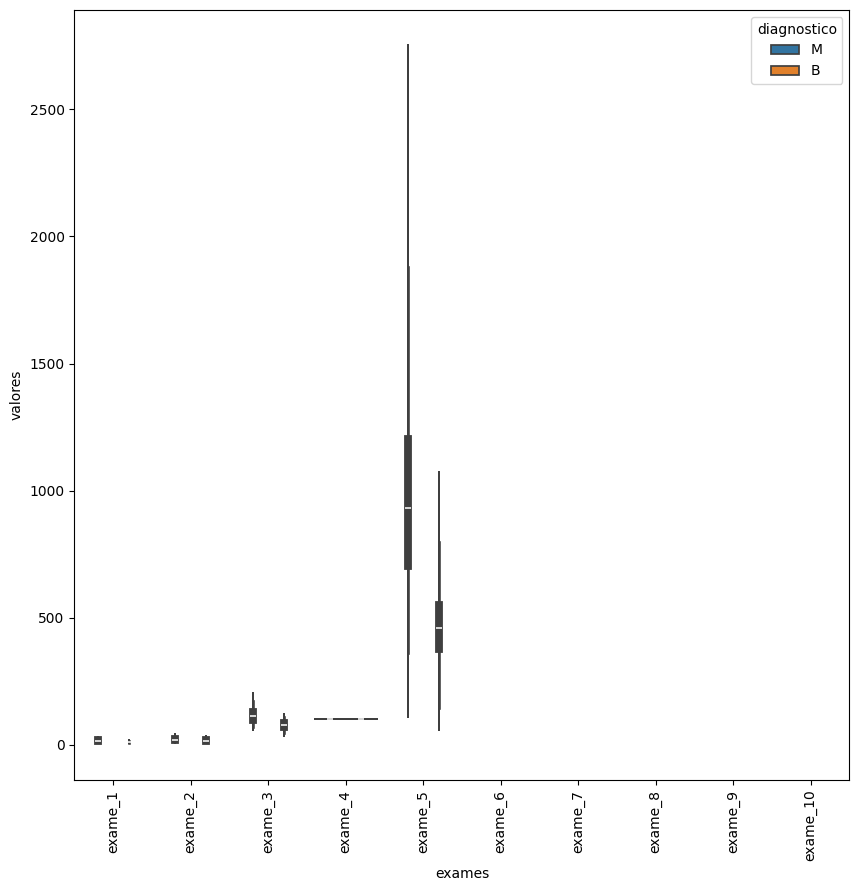

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

dados_plot = pd.concat([y, x.iloc[:,0:10]], axis=1)

dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')

plt.figure(figsize=(10,10))

sns.violinplot(x='exames', y='valores', hue='diagnostico', data=dados_plot)

plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'exame_1'),
  Text(1, 0, 'exame_2'),
  Text(2, 0, 'exame_3'),
  Text(3, 0, 'exame_4'),
  Text(4, 0, 'exame_5'),
  Text(5, 0, 'exame_6'),
  Text(6, 0, 'exame_7'),
  Text(7, 0, 'exame_8'),
  Text(8, 0, 'exame_9'),
  Text(9, 0, 'exame_10')])

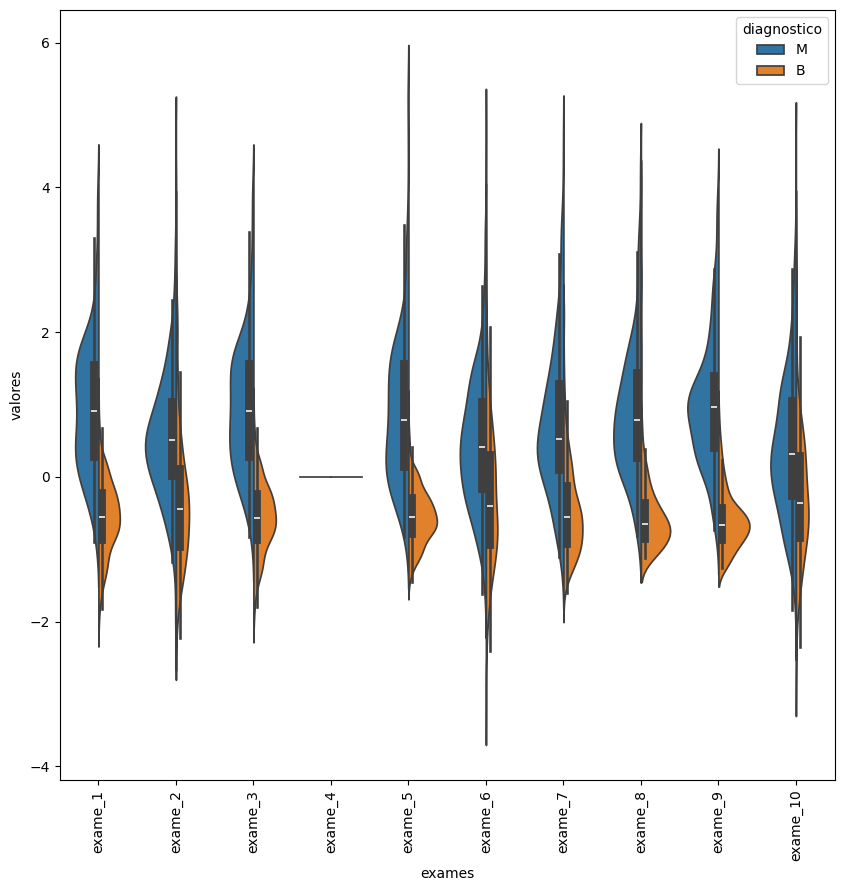

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()

padronizador.fit(x)

x_2 = padronizador.transform(x)
x_2 = pd.DataFrame(x_2, columns=x.columns)

dados_plot = pd.concat([y, x_2.iloc[:,0:10]], axis=1)

dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')

plt.figure(figsize=(10,10))

sns.violinplot(x='exames', y='valores', hue='diagnostico', data=dados_plot, split=True)

plt.xticks(rotation=90)



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'exame_11'),
  Text(1, 0, 'exame_12'),
  Text(2, 0, 'exame_13'),
  Text(3, 0, 'exame_14'),
  Text(4, 0, 'exame_15'),
  Text(5, 0, 'exame_16'),
  Text(6, 0, 'exame_17'),
  Text(7, 0, 'exame_18'),
  Text(8, 0, 'exame_19'),
  Text(9, 0, 'exame_20')])

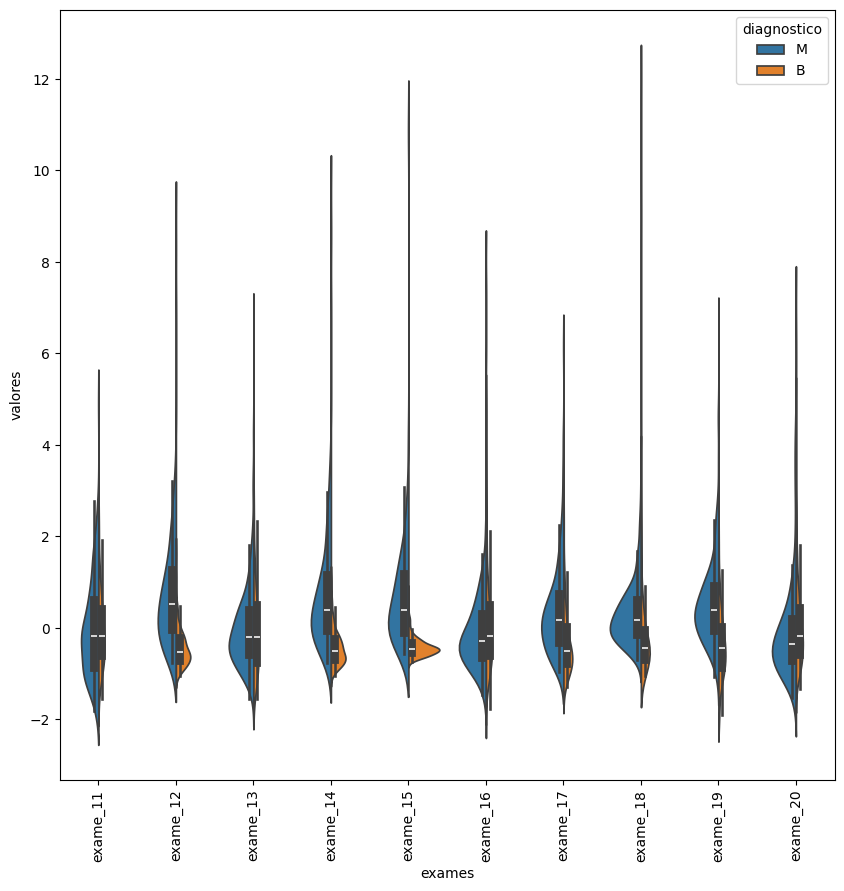

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()

padronizador.fit(x)

x_2 = padronizador.transform(x)
x_2 = pd.DataFrame(x_2, columns=x.columns)

dados_plot = pd.concat([y, x_2.iloc[:,10:20]], axis=1)

dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')

plt.figure(figsize=(10,10))

sns.violinplot(x='exames', y='valores', hue='diagnostico', data=dados_plot, split=True)

plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'exame_21'),
  Text(1, 0, 'exame_22'),
  Text(2, 0, 'exame_23'),
  Text(3, 0, 'exame_24'),
  Text(4, 0, 'exame_25'),
  Text(5, 0, 'exame_26'),
  Text(6, 0, 'exame_27'),
  Text(7, 0, 'exame_28'),
  Text(8, 0, 'exame_29'),
  Text(9, 0, 'exame_30')])

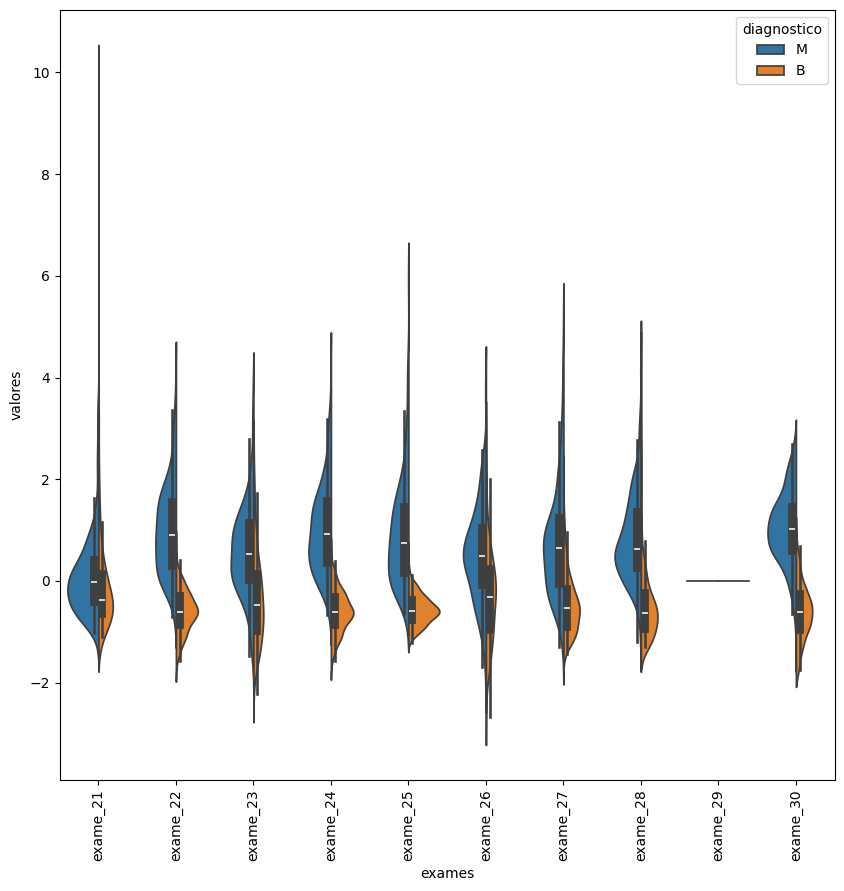

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()

padronizador.fit(x)

x_2 = padronizador.transform(x)
x_2 = pd.DataFrame(x_2, columns=x.columns)

dados_plot = pd.concat([y, x_2.iloc[:,20:30]], axis=1)

dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')

plt.figure(figsize=(10,10))

sns.violinplot(x='exames', y='valores', hue='diagnostico', data=dados_plot, split=True)

plt.xticks(rotation=90)

([0, 1], [Text(0, 0, 'exame_31'), Text(1, 0, 'exame_32')])

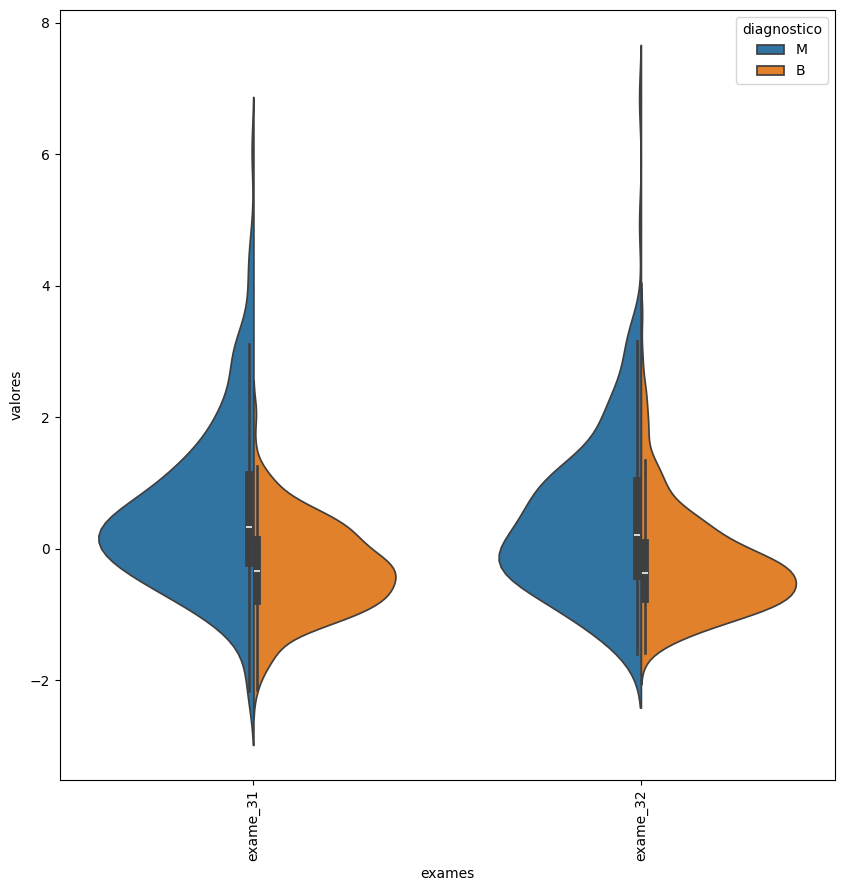

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()

padronizador.fit(x)

x_2 = padronizador.transform(x)
x_2 = pd.DataFrame(x_2, columns=x.columns)

dados_plot = pd.concat([y, x_2.iloc[:,30:]], axis=1)

dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')

plt.figure(figsize=(10,10))

sns.violinplot(x='exames', y='valores', hue='diagnostico', data=dados_plot, split=True)

plt.xticks(rotation=90)

In [34]:
from numpy import random


SEED = 42

random.seed(SEED)

x_3 = x_2.drop(['exame_4','exame_29'], axis=1)
y = data['diagnostico']


treino_x, teste_x, treino_y, teste_y = train_test_split(x_3, y, test_size=0.30, random_state=42)


model_2 = RandomForestClassifier(n_estimators=100)

model_2.fit(treino_x, treino_y)

model_2.score(teste_x, teste_y)


0.9707602339181286

<Axes: >

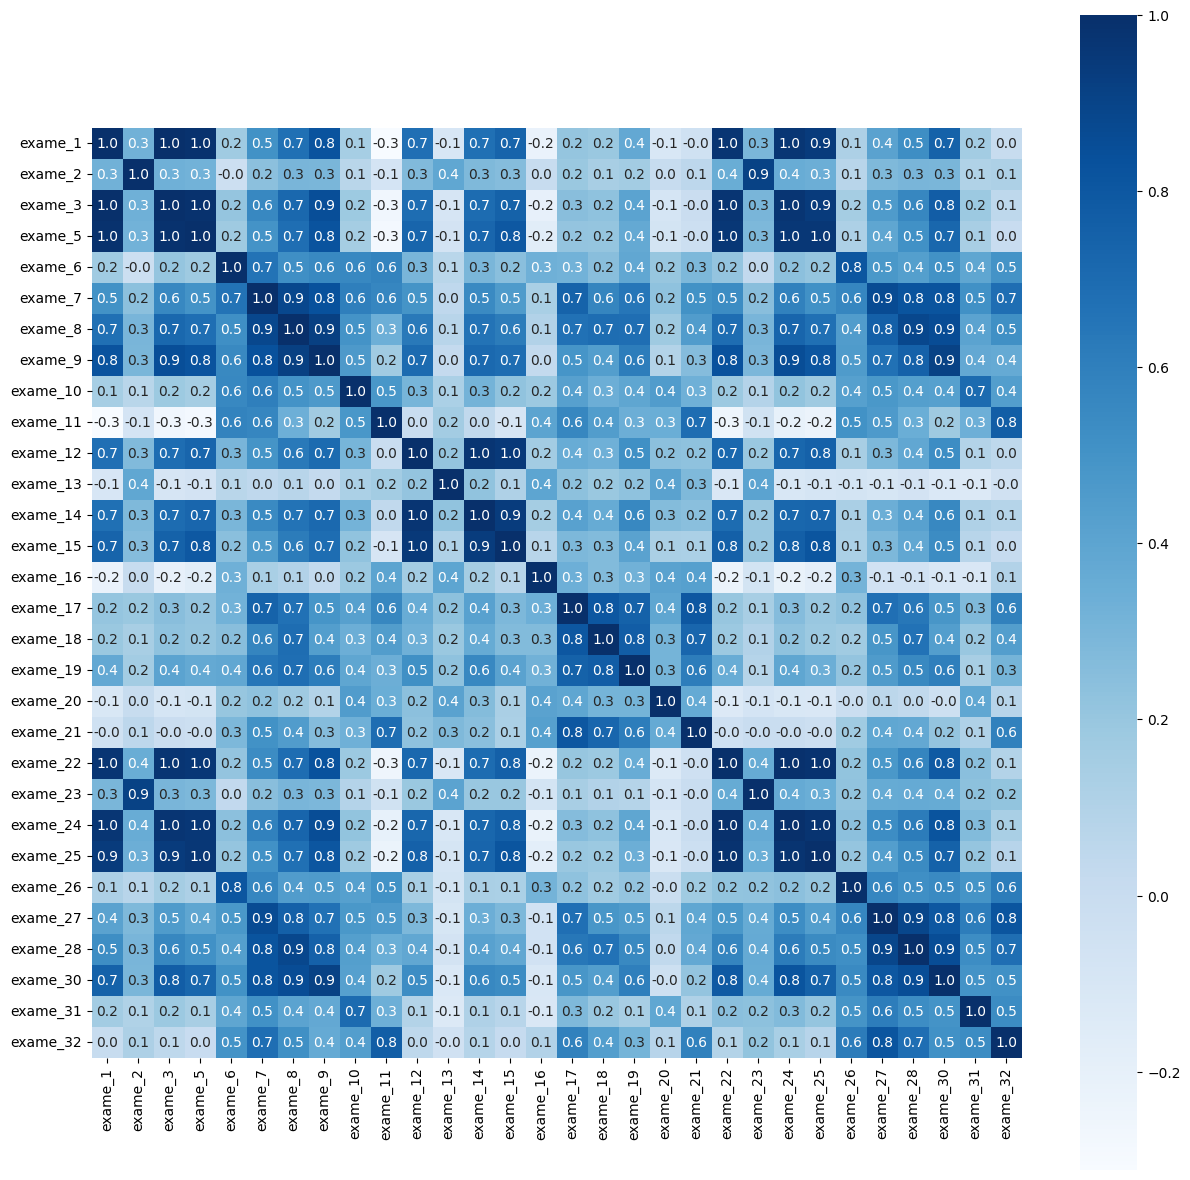

In [39]:
matriz_corr = x_3.corr()

plt.figure(figsize=(15,15))
sns.heatmap(matriz_corr, cmap='Blues', fmt='.1f', square=True, linecolor='white', annot=True)

In [41]:
matriz_corr_1 = matriz_corr[matriz_corr > 0.99]
matriz_corr_1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
matriz_corr_2 = matriz_corr_1.sum()

matriz_corr_2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [45]:
variaveis_corr = matriz_corr_2[matriz_corr_2 > 1]
variaveis_corr

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [60]:
x_4 = x_3.drop(columns=["exame_3", "exame_24"])

from numpy import random


SEED = 42

random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x_4, y, test_size=0.30, random_state=42)


model_2 = RandomForestClassifier(n_estimators=100)

model_2.fit(treino_x, treino_y)

model_2.score(teste_x, teste_y)

0.9707602339181286

In [54]:
x_5 = x.drop(columns=["exame_3", "exame_24", "exame_4", "exame_29"])

In [59]:
from sklearn.feature_selection import SelectKBest, chi2

SEED = 42

random.seed(SEED)


SELECAO = SelectKBest(chi2, k=5)

treino_x, teste_x, treino_y, teste_y = train_test_split(x_5, y, test_size=0.30, random_state=42)

SELECAO.fit(treino_x, treino_y)

treino_kbest = SELECAO.transform(treino_x)
teste_kbest = SELECAO.transform(teste_x)

model_3 = RandomForestClassifier(n_estimators=100)

model_3.fit(treino_kbest, treino_y)

model_3.score(teste_kbest, teste_y)

0.935672514619883

In [57]:
treino_kbest

array([[ 13.74, 585.  ,  21.47,  15.34, 725.9 ],
       [ 13.37, 553.5 ,  14.66,  14.26, 632.1 ],
       [ 14.69, 656.1 ,  49.45,  16.46, 809.2 ],
       ...,
       [ 14.29, 632.6 ,  10.77,  14.91, 684.6 ],
       [ 13.98, 599.5 ,  18.85,  17.04, 869.3 ],
       [ 12.18, 458.7 ,  14.68,  13.34, 547.8 ]])

In [62]:
from sklearn.metrics import confusion_matrix

previsoes = model_3.predict(teste_kbest)

confusao = confusion_matrix(teste_y, previsoes)

[Text(0.5, 80.7222222222222, 'Predição'), Text(95.72222222222221, 0.5, 'Real')]

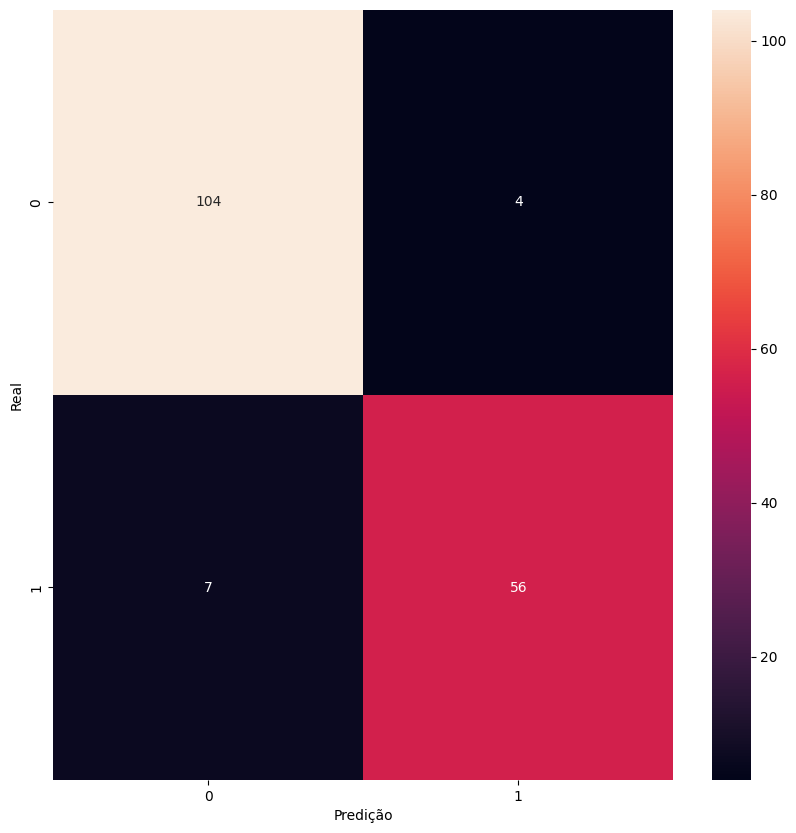

In [65]:
plt.figure(figsize=(10,10))
sns.heatmap(confusao, annot=True, fmt='d').set(xlabel='Predição', ylabel='Real')

Resultado da classificação 96.49%


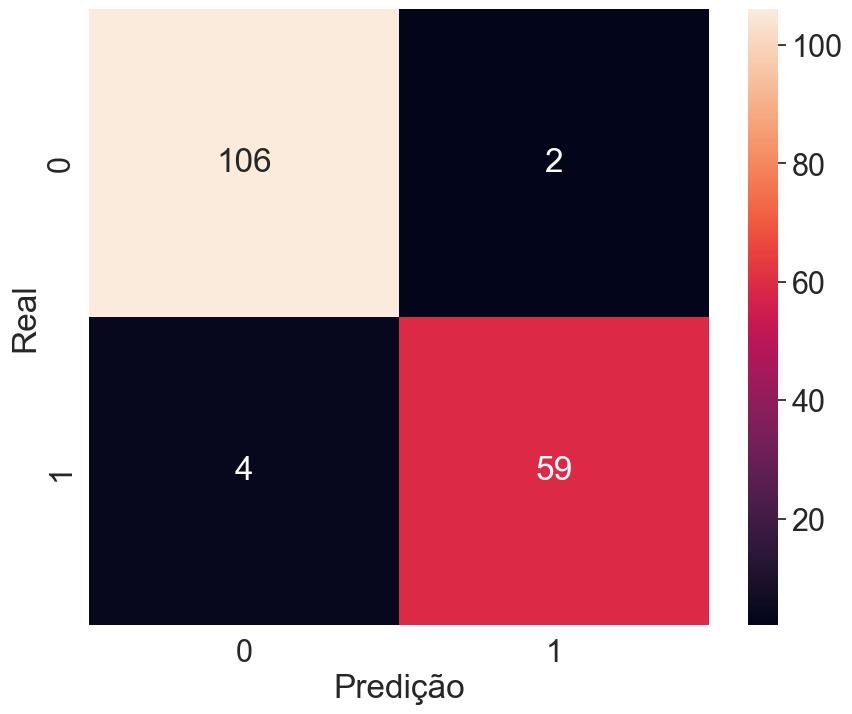

In [66]:
from sklearn.feature_selection import RFE

SEED= 42
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x_5, 
                                                        y,
                                                        test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)
selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 5, step = 1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)
classificador.fit(treino_rfe, treino_y)

matriz_confusao = confusion_matrix(teste_y,classificador.predict(teste_rfe))
plt.figure(figsize = (10, 8))
sns.set(font_scale= 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel= "Real")

print("Resultado da classificação %.2f%%" %(classificador.score(teste_rfe,teste_y)*100))

Resultado da classificação 97.66%


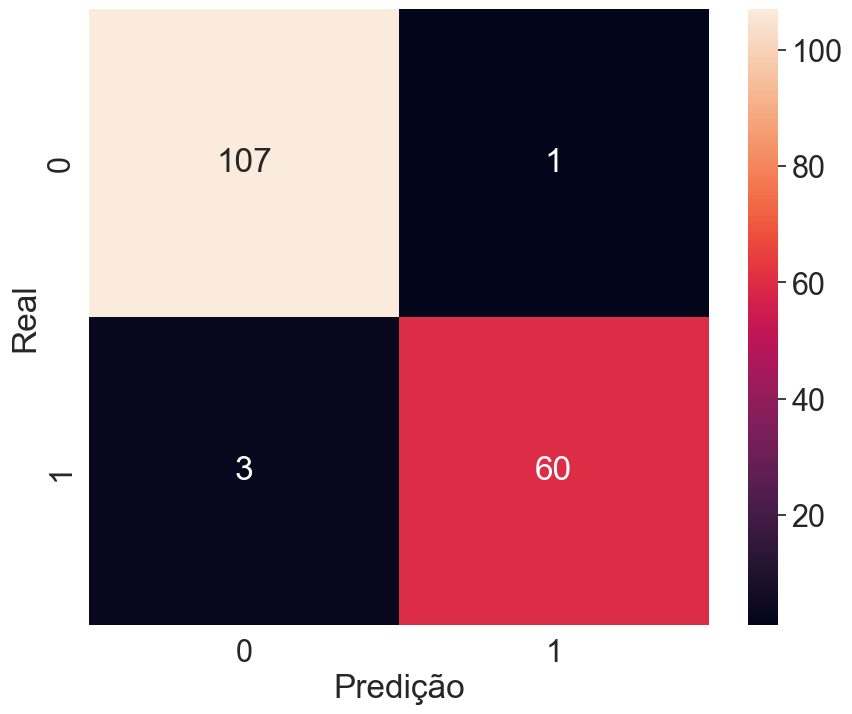

In [73]:
from sklearn.feature_selection import RFECV

SEED= 42
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x_5, 
                                                        y,
                                                        test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)
selecionador_rfecv = RFECV(estimator = classificador, cv= 5, step = 1, scoring='accuracy')
selecionador_rfecv.fit(treino_x, treino_y)
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)
classificador.fit(treino_rfecv, treino_y)

matriz_confusao = confusion_matrix(teste_y,classificador.predict(teste_rfecv))
plt.figure(figsize = (10, 8))
sns.set(font_scale= 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel= "Real")

print("Resultado da classificação %.2f%%" %(classificador.score(teste_rfecv,teste_y)*100))

In [76]:
selecionador_rfecv.cv_results_['mean_test_score']

array([0.86427215, 0.89699367, 0.93221519, 0.93471519, 0.93468354,
       0.93971519, 0.93971519, 0.94971519, 0.94718354, 0.95227848,
       0.95477848, 0.95981013, 0.96481013, 0.95981013, 0.95481013,
       0.94221519, 0.95977848, 0.95227848, 0.9521519 , 0.95471519,
       0.94968354, 0.95224684, 0.95727848, 0.95218354, 0.94974684,
       0.95477848, 0.94968354, 0.96231013])

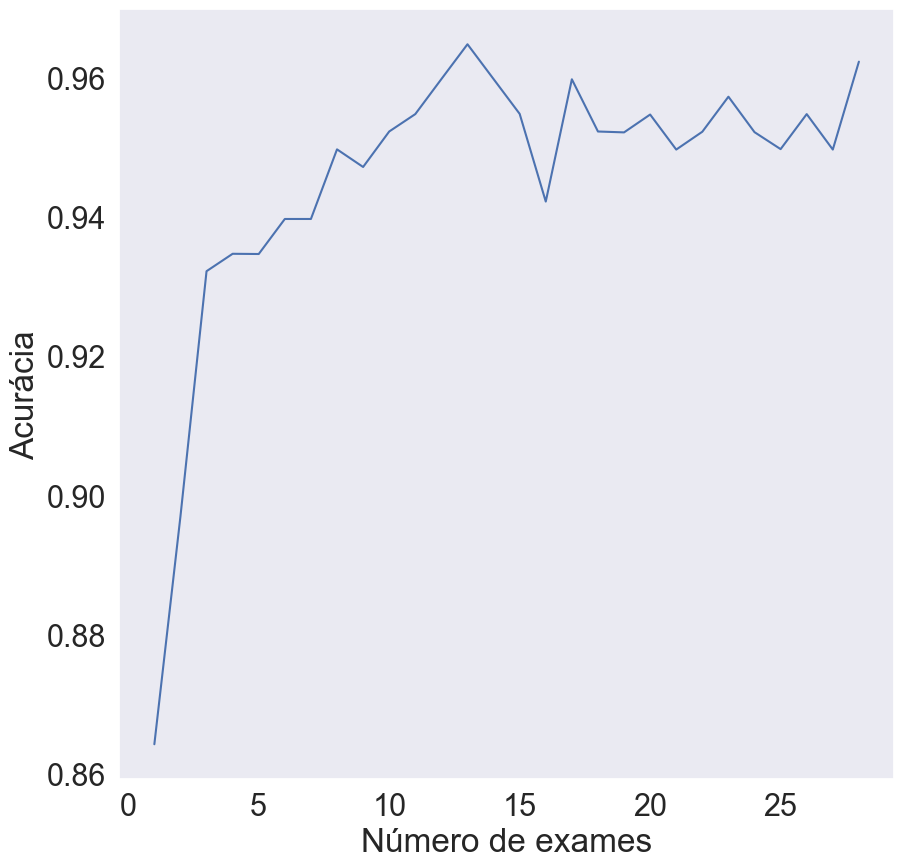

In [77]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,10))

plt.xlabel("Número de exames")
plt.ylabel("Acurácia")

plt.grid()

plt.plot(range(1, len(selecionador_rfecv.cv_results_['mean_test_score']) + 1), selecionador_rfecv.cv_results_['mean_test_score'])